<h1 align="center">Classification of Arrhythmia</h1>

### Importing Essential Libraries

In [45]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

In [46]:
df=pd.read_csv("arrhythmia (1).csv",header=None)

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [48]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
899,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
900,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
901,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
902,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1
903,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0,0.5,1.6,21.3,32.8,1


**Basic Description of dataframe**

In [49]:
df.shape

(904, 280)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Columns: 280 entries, 0 to 279
dtypes: float64(116), int64(159), object(5)
memory usage: 1.9+ MB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,904.0,46.471239,16.457511,0.0,36.00,47.00,58.000,83.0
1,904.0,0.550885,0.497679,0.0,0.00,1.00,1.000,1.0
2,904.0,166.188053,37.149753,105.0,160.00,164.00,170.000,780.0
3,904.0,68.170354,16.581614,6.0,59.00,68.00,79.000,176.0
4,904.0,88.920354,15.355884,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,904.0,0.514823,0.347338,-0.8,0.40,0.50,0.700,2.4
276,904.0,1.222345,1.425262,-6.0,0.50,1.35,2.100,6.0
277,904.0,19.326106,13.496442,-44.2,11.45,18.10,25.825,88.8
278,904.0,29.473230,18.483684,-38.6,17.55,27.90,41.125,115.9


# 1. Data preprocessing

**Checking for null values in dataset**

In [52]:
pd.isnull(df).sum().sum()

0

In [53]:
df = df.replace('?', np.NaN)

In [54]:
nu=pd.isnull(df).sum().sum()
nu

816

**Visualizing  the distribution of our missing data:**

Text(0, 0.5, 'Total number of null value in each column')

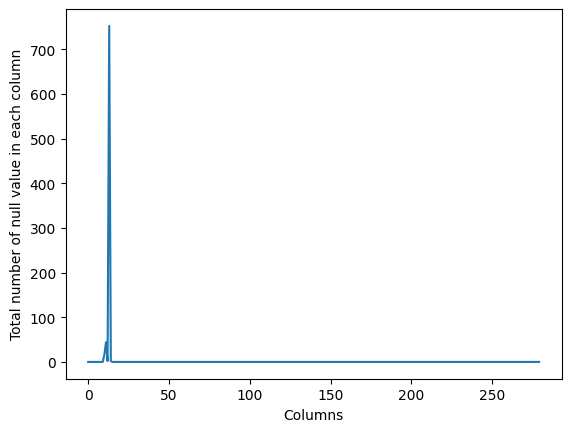

In [55]:
pd.isnull(df).sum().plot()
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

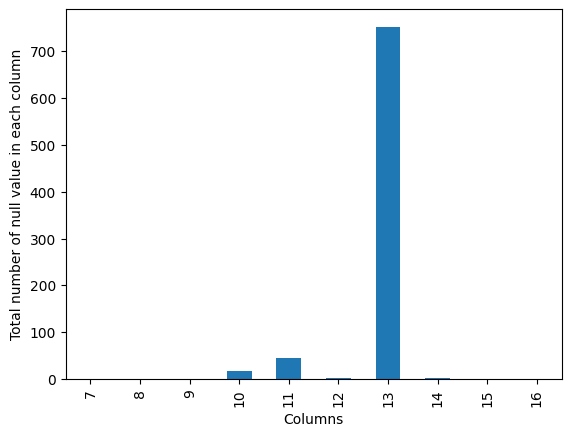

In [56]:
#Zooming in
pd.isnull(df).sum()[7:17].plot(kind="bar")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [57]:
df.drop(columns = 13,inplace=True)

**Using the mean strategy for imputation**

In [58]:
new_df =df.copy()

In [59]:
cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [60]:
my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [61]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [62]:
pd.isnull(new_df).sum().sum()

0

**Generating final dataset**

In [63]:
#Creating column names
final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [64]:
new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


As our dataframe is completely cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [65]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [66]:
final_df.shape

(904, 278)

In [67]:
class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [68]:
t=new_df.sort_values(by=["class"])

In [69]:
la = t["class"].value_counts(sort=False).tolist()
la

[490, 88, 30, 30, 26, 50, 6, 4, 18, 100, 8, 10, 44]

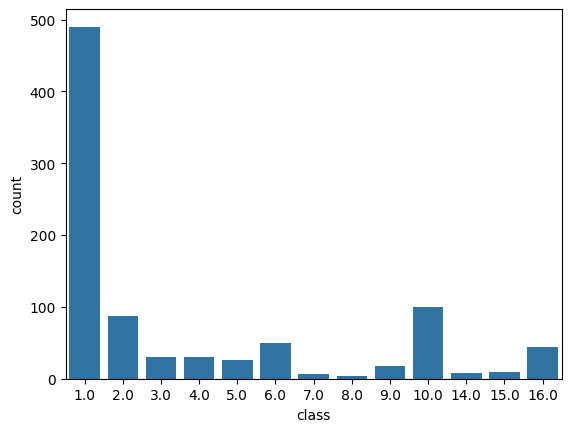

In [70]:
sns.countplot(x ='class',data =new_df)
plt.show()

Lets Count the total number of instances we have for each class.

In [71]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[490, 88, 30, 30, 26, 50, 6, 4, 18, 100, 0, 0, 0, 8, 10, 44]


## Feature Scaling and Splitting dataset
<br />
We will be using 80% of our dataset for training purpose and 20% for testing purpose.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

# **3. Modeling**

In [75]:
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

## KNN Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [77]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))

result = pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy})
result

Model             KNN Classifier
Train Accuracy           0.73444
Test Accuracy           0.723757
dtype: object

## Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [79]:
dt_train_accuracy = accuracy_score(y_train,y_pred_train)
dt_test_accuracy = accuracy_score(y_test, y_pred_test)
result = pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy})
result

Model             Decision Tree Classifier
Train Accuracy                    0.771784
Test Accuracy                     0.729282
dtype: object

## Kernelized SVM

In [80]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [81]:
ksvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.Series({'Model':'Kernelized SVC','Train Accuracy':ksvc_train_accuracy_score,'Test Accuracy':ksvc_test_accuracy_score})
result

Model             Kernelized SVC
Train Accuracy          0.885201
Test Accuracy           0.828729
dtype: object

## Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [83]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy_score = accuracy_score(y_train, y_pred_train)
rf_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy_score,'Test Accuracy':rf_test_accuracy_score})
result

Model             Random Forest Classifier
Train Accuracy                    0.865837
Test Accuracy                      0.78453
dtype: object

## Random Over Sampling

In [84]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
X_resampled, y_resampled = ros.fit_resample(final_df, target)

X_resampled.shape

(6370, 278)

In [85]:
X_resampled, y_resampled = ros.fit_resample(final_df, target)

In [86]:
X_resampled.shape

(6370, 278)

In [87]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=1)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

## PCA

In [89]:
from sklearn.decomposition import PCA
pca = PCA(.99)
pca.fit(X_train1)

pca.n_components_

121

In [90]:
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

## KNN with PCA

In [91]:
classifier = KNeighborsClassifier()
classifier.fit(X_train1, y_train1)
Y_pred = classifier.predict(X_test1)

In [92]:
knnp_train_accuracy = accuracy_score(y_train1,classifier.predict(X_train1))
knnp_test_accuracy = accuracy_score(y_test1,Y_pred)
result = pd.Series({'Model':'Knn with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy})
print(result)
conf_matrix = confusion_matrix(y_test1, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Model             Knn with PCA
Train Accuracy        0.981554
Test Accuracy         0.979592
dtype: object
Confusion Matrix:
[[ 65   2   0   5   4  10   0   0   0   2   0   0   3]
 [  0  99   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 112   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  95   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 105   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  97   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 102   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 101]]


## Decision Tree Classifier with PCA

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
dtpclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtpclassifier.fit(X_train1, y_train1)
y_pred_test = dtpclassifier.predict(X_test1)
y_pred_train = dtpclassifier.predict(X_train1)

In [94]:
dtp_train_recall_score = recall_score(y_train1, y_pred_train, average='weighted')
dtp_test_recall_score = recall_score(y_test1, y_pred_test, average='weighted')

dtp_train_accuracy_score = accuracy_score(y_train1, y_pred_train)
dtp_test_accuracy_score = accuracy_score(y_test1, y_pred_test)

In [95]:
result = pd.Series({'Model':'Decision Tree with PCA','Train Accuracy':dtp_train_accuracy_score,'Test Accuracy':dtp_test_accuracy_score})
result
conf_matrix = confusion_matrix(y_test1, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)
print(result)

Confusion Matrix:
[[ 79   4   0   0   2   2   0   0   0   0   0   2   2]
 [  0  99   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 112   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  95   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 105   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  97   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 102   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 101]]
Model             Decision Tree with PCA
Train Accuracy                       1.0
Test Accuracy                   0.990581
dtype: object


## Kernelized SVM with PCA

In [96]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf',C=1,gamma=0.1)
KSVC_clf.fit(X_train1, y_train1)
y_pred_train1 = KSVC_clf.predict(X_train1)
y_pred_test1 = KSVC_clf.predict(X_test1)

In [97]:
ksvcp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
ksvcp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)
result = pd.Series({'Model':'Kernelized SVM with PCA','Train Accuracy':ksvcp_train_accuracy_score,'Test Accuracy':ksvcp_test_accuracy_score})
print(result)
conf_matrix = confusion_matrix(y_test1, y_pred_test1)
print("Confusion Matrix:")
print(conf_matrix)

Model             Kernelized SVM with PCA
Train Accuracy                        1.0
Test Accuracy                         1.0
dtype: object
Confusion Matrix:
[[ 91   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  99   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 112   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  95   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 105   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  97   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 102   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 101]]


## Random Forest with PCA

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train1, y_train1)

RandomForestClassifier()

In [99]:
y_pred_train1 = rfp_clf.predict(X_train1)
y_pred_test1 = rfp_clf.predict(X_test1)
rfp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

In [100]:
result = pd.Series({'Model':'Random Forest with PCA','Train Accuracy':rfp_train_accuracy_score,'Test Accuracy':rfp_test_accuracy_score})
print(result)
conf_matrix = confusion_matrix(y_test1, y_pred_test1)
print("Confusion Matrix:")
print(conf_matrix)

Model             Random Forest with PCA
Train Accuracy                       1.0
Test Accuracy                        1.0
dtype: object
Confusion Matrix:
[[ 91   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  99   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 112   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  95   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 105   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  97   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 102   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 101]]


# Result

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data.
The Best model recall score is Kernalized SVM with PCA having accuracy of **99.686%.**
